**CV2022 - Week 1**

EXERCISES 

**1bp** 1) Using numpy indexing implement a generic 2D convolution operation working on single channel inputs. Consider using both indexing and block matrix operations to compute the convolution output. Compare the runtime against the dimensions of the convolution filter, keeping the same image dimensions. Plot the result of the convolution on each channel using subfigures from matplotlib.


**1bp** 2) Using the generic convolution operation, implement different image gradients and different smoothing filters. Plot the filtered output against the image input. Why are the results becoming more/less sharp, after each filtering operation? 


**2bp** 3) Given a noisy image, apply Otsu binarization on the noisy image and a gaussian filtered output of the same image. Discuss the results given the particularities of Otsu's algorithm. Discuss about the two phases of the iterative procedure, and how the procedure converges to the given solution. 

Documentation of the opencv function: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#otsus-binarization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




Contents:

PYTHON INTRODUCTION

1) [Python datatypes:](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=bTIPcyAx6OJi&line=3&uniqifier=1)

2) [Python statements:](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=VpWPIoOi6xDt&line=4&uniqifier=1)

3) [Pyhton iterables: ](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=_6FwTdFP7WCu&line=2&uniqifier=1)

4) [List comprehension:](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=hSKMFvgW7aHS&line=4&uniqifier=1)

5) [Data structures](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=4ZTuUHqvAz2o&line=6&uniqifier=1)

6) [File I/O](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=0Ax4AhMRDV6X&line=4&uniqifier=1)

7) [Functions](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=QuXEchJDEtiP&line=2&uniqifier=1)

8) [Exceptions handling](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=4SvphhL9FyWu&line=6&uniqifier=1)




You can find the official documentation at: https://docs.python.org/3.6/tutorial/index.html

1.1 Datatypes

In [2]:
question = "What is the answer?"
answer = 42
percent = 0.25
power_on = True
print(type(question))
print(type(answer))
print(type(percent))
print(type(power_on))


<class 'str'>
<class 'int'>
<class 'float'>
<class 'bool'>


1.2 Statements

In [3]:
done = False
while not done:
  option = int(input("Option: "))
  if option == 0:
    break
  elif option > 9:
    continue
  else:
    print("Your option was: ", option)

Option: 1
Your option was:  1
Option: 10
Option: 0


In [ ]:
elements = ['some', 'items', 3.14, 42, True]
for item in elements:
  print(item)


some
items
3.14
42
True


In [ ]:
for i in range(len(elements)):
  print(elements[i])

some
items
3.14
42
True


In [ ]:
fruits = ['Banana', 'Apple', 'Lime']
loud_fruits = [f.upper() for f in fruits]
print(loud_fruits)


['BANANA', 'APPLE', 'LIME']


1.3 Data structures

In [ ]:
my_list =  ['this', 'is', 'the', 1]
print(my_list  + ["exercise", "of", 2021])

my_set =  {1, 3, 5, 7, 11}
print(5 in my_set)
print(2021 in my_set)


my_dict  =  {'John': 24, 'Jane': 22}
print(my_dict['John'])
print(my_dict.keys())
print(my_dict.values())


my_tuple =  (13.5, 7, 255)
print(my_tuple[-1])

print(my_dict['Alex'])


['this', 'is', 'the', 1, 'exercise', 'of', 2021]
True
False
24
dict_keys(['John', 'Jane'])
dict_values([24, 22])
255


KeyError: ignored

1.4 File I/O

In [4]:
f = open('/content/drive/MyDrive/CV2022/w1/sample_text.txt', 'r')
data = f.read()
f.close()
print(data)

This is the first week of CV2022.
We are learning how to code in python.


In [5]:
with open('/content/drive/MyDrive/CV2022/w1/sample_text.txt', "r") as inner_f:
  for line in inner_f:
    print(line)

# inner_f should be closed
data = inner_f.read()


This is the first week of CV2022.

We are learning how to code in python.


ValueError: ignored

1.5 Functions

In [ ]:
def add(a=42, b=0):
  return a + b

r = [add(1, 1), add(a=1, b=2), add(b=3), add()]

print(r)

# Syntax Error raised by the unnamed argument 
# used after a named argument
add(b=5, a=42)


[2, 3, 45, 42]


47

1.6 Exception handling

In [ ]:

my_dict  =  {'John': 24, 'Jane': 22}

try:
  print(my_dict['Alex'])
except KeyError:
  print("The key {} can not be found in our dict".format('Alex'))
  exit()
finally:
  print("I am ready to code in Python now")


The key Alex can not be found in our dict
I am ready to code in Python now


NUMPY INTRODUCTION

1) [NUMPY ARRAYS, SHAPE, INDEXING](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=zEnIM0A4HL2j&line=5&uniqifier=1)

2) [Basic Operations](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=aWleT_YIN71_&line=4&uniqifier=1)

3) [Random numbers](https://colab.research.google.com/drive/1lYh2l-u4hacsgnLiL-BCTK913QuYU8DF#scrollTo=3TIsQcj1ObRE&line=2&uniqifier=1)



Documentation can be found at https://numpy.org/doc/stable/user/quickstart.html

In [6]:
import numpy as np 
print(np.zeros((3, 4)))
print(np.ones((2, 3 , 4)))

numbers = [1, 2, 3, 4, 5, 6]
print(np.array(numbers))
arr_numbers = np.array(numbers)
print(arr_numbers[2:])
print(arr_numbers[:4])
print(arr_numbers[1:4])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
[1 2 3 4 5 6]
[3 4 5 6]
[1 2 3 4]
[2 3 4]


In [7]:
a = np.arange(0, 2, 0.2)
print(a)
b = np.sin(a).reshape(2,5)
print(b)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
[[0.         0.19866933 0.38941834 0.56464247 0.71735609]
 [0.84147098 0.93203909 0.98544973 0.9995736  0.97384763]]


In [8]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )
print(A * B)
print(A @ B)

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]


In [14]:
a = 2 * np.random.random((200,)) - 1
b = 2 * np.random.random((200,)) - 1
print(a.dot(b))

11.994454256725385


In [15]:
x = np.arange(0,10,2)
y = np.arange(5)

m = np.vstack([x,y])
print(m, m.shape)

xy = np.hstack([x,y])
print(xy, xy.shape)


[[0 2 4 6 8]
 [0 1 2 3 4]] (2, 5)
[0 2 4 6 8 0 1 2 3 4] (10,)


3. Image manipulation and processing


2) IMAGE MANIPULATION


In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


3.1 Image load and display

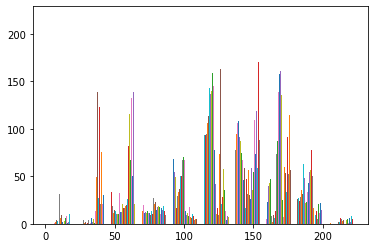

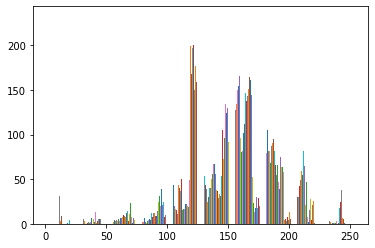

(array([[248.,  28.,   1., ...,  10.,   0.,   0.],
        [246.,  30.,   0., ...,  10.,   0.,   0.],
        [245.,  30.,   1., ...,  12.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  52.,  80.,  47.],
        [  0.,   0.,   0., ...,  50.,  83.,  51.],
        [  0.,   0.,   0., ...,  55.,  86.,  51.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 600 Lists of Patches objects>)

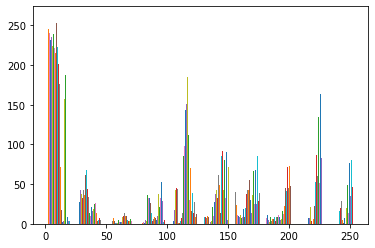

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

bender_img = cv.imread("/content/drive/MyDrive/CV2022/pics/bender.png") 

b, g, r = cv.split(bender_img)
plt.hist(b)
plt.show()
plt.hist(g)
plt.show()
plt.hist(r)

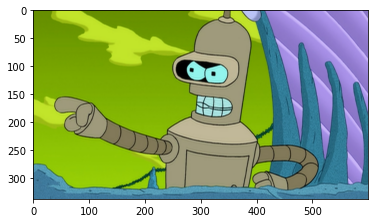

In [18]:
plt.imshow(bender_img)

3.2 Image channels manipulation

The image comes in BGR format, so we can split the chanels to plot each channel separately

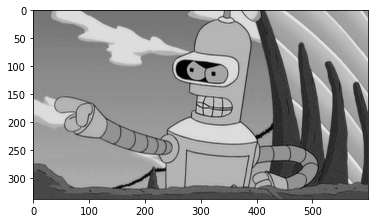

In [19]:
b, g, r = cv.split(bender_img)
bender_img_rgb = cv.merge([r, g, b])

plt.imshow(b, 'gray')

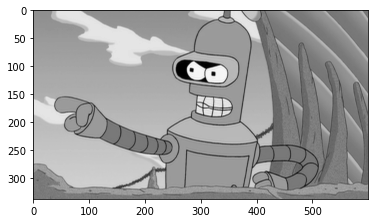

In [20]:
plt.imshow(g, 'gray')

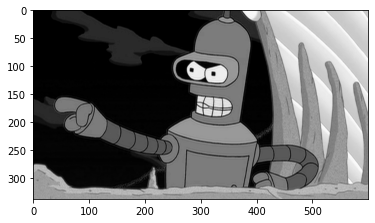

In [21]:
plt.imshow(r, 'gray')

3.3 Transformation between different representations

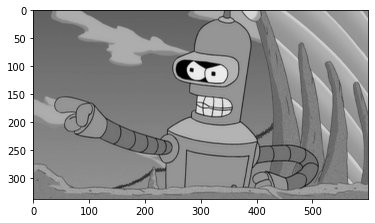

In [22]:
grayImg = cv.cvtColor(bender_img, cv.COLOR_BGR2GRAY) # transform BGR image to gray scale image
plt.imshow(grayImg,cmap='gray')


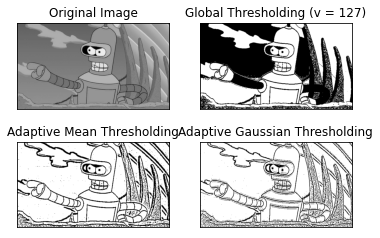

In [23]:
#Transform image from multiple level of gray to binary image
ret,th1 = cv.threshold(grayImg,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(grayImg,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(grayImg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [grayImg, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

3.4 Image manipulation

<class 'numpy.ndarray'>


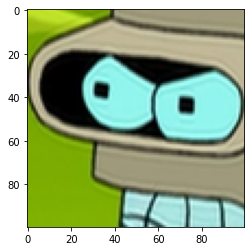

In [24]:
#Crop a piece of image
print(type(bender_img))
cropped = bender_img[70:170, 250:350]
plt.imshow(cropped)

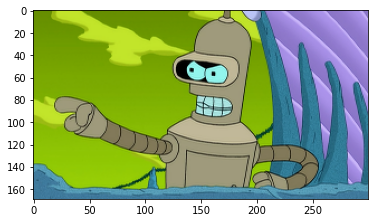

In [25]:
dim = (300,169)
# Resize image to dim using cubic interpolation
res = cv.resize(bender_img, dim, interpolation=cv.INTER_CUBIC) 
plt.imshow(res)

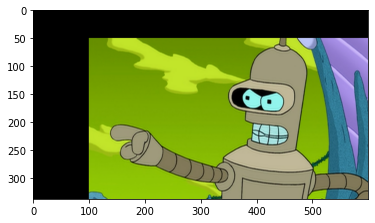

In [26]:
rows,cols = bender_img.shape[:2] # Getting the shape of the image
M = np.float32([[1,0,100],[0,1,50]]) # Parameters of the translation<class 'numpy.ndarray'>
dst = cv.warpAffine(bender_img,M,(cols,rows)) # Translation of a image 
plt.imshow(dst)

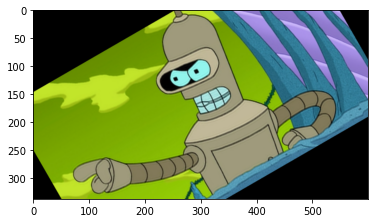

In [27]:
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),30,1) # Angle of the rotation with respect to center of image
dst = cv.warpAffine(bender_img,M,(cols,rows)) # Rotate the image
plt.imshow(dst)

3.5 Pyramid representation of images

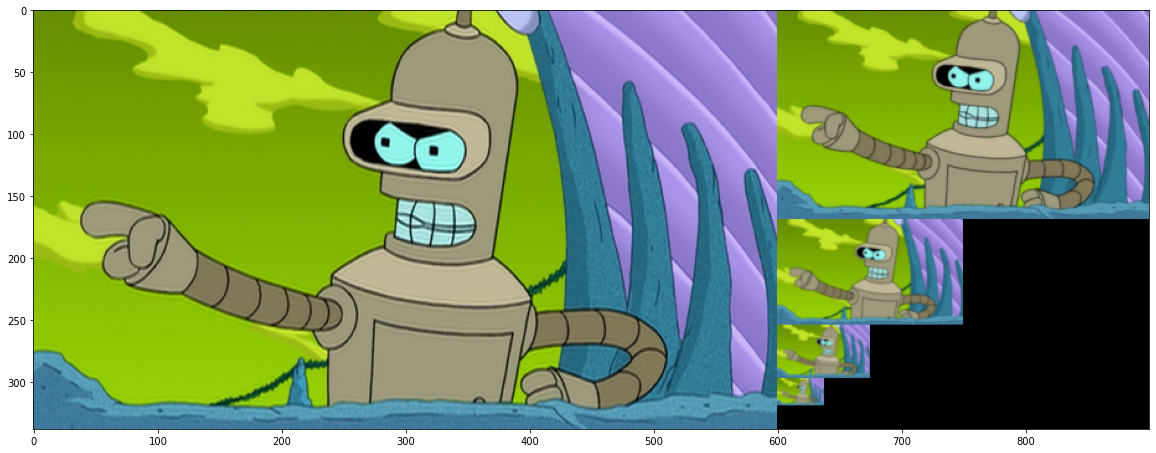

In [28]:
layer = bender_img.copy() 

rows, cols, dim = layer.shape
composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.uint8)

composite_image[:rows, :cols, :] = layer
i_row = 0

for i in range(4): 
    # using pyrDown() function 
    layer = cv.pyrDown(layer)
    n_rows, n_cols = layer.shape[:2] 
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = layer
    i_row += n_rows

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(composite_image)
plt.show()

3.6 Brightness enhancement


Text(0.5, 1.0, 'Enhanced image')

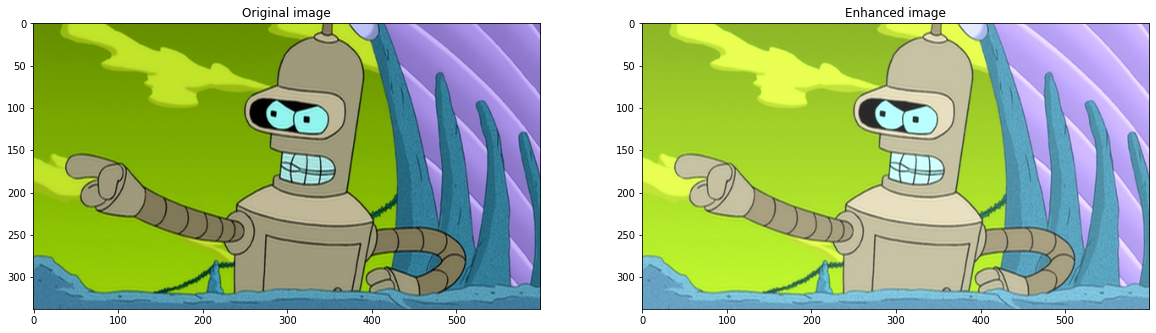

In [31]:
# Contrast/brightness change
img = bender_img.copy() 
new_image = np.zeros(img.shape, img.dtype)
alpha = 1.0 # Simple contrast control value [1.0-3.0]
beta = 40    # Simple brightness  value [0-100]

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)

fig, ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(new_image)
ax[1].set_title('Enhanced image')

3.7 Gamma correction


Text(0.5, 1.0, 'Gamma correction')

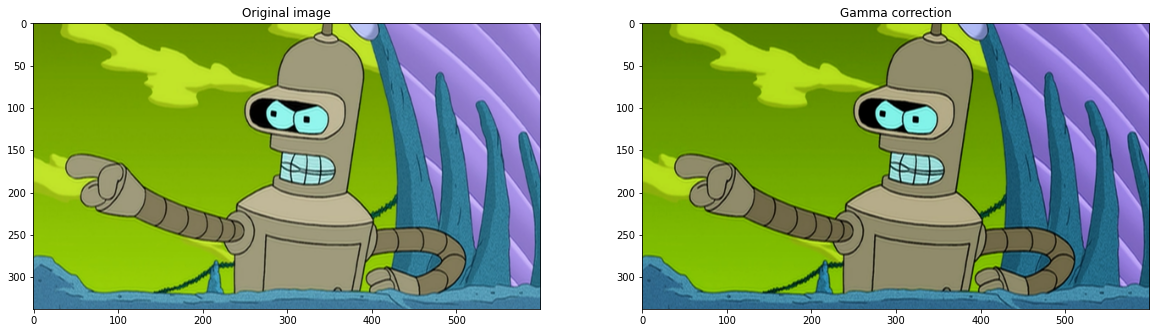

In [ ]:
lookUpTable = np.empty((1,256), np.uint8)
gamma = 1.2
for i in range(256):
  lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(img, lookUpTable)

fig, ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(res)
ax[1].set_title('Gamma correction')

3.8 Image histogram

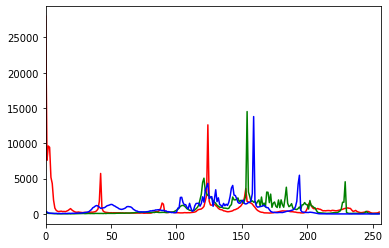

In [ ]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([bender_img_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

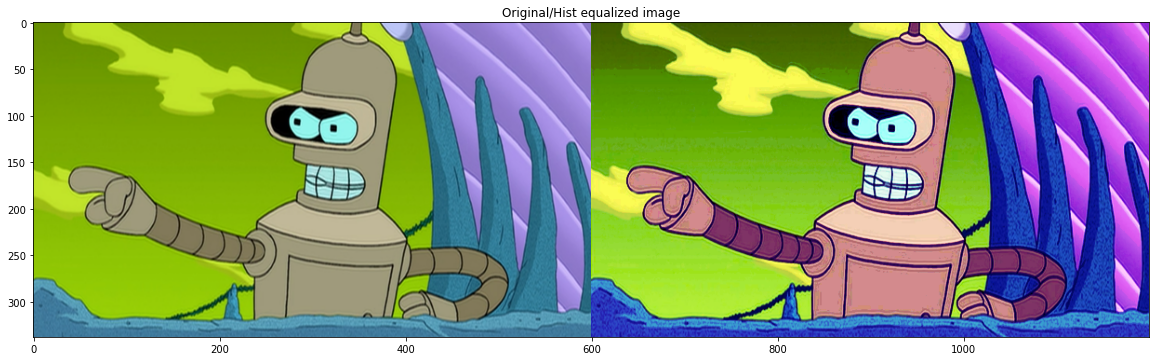

In [ ]:
# Histogram equalize
d1 = cv.equalizeHist(img[:,:,0])
d2 = cv.equalizeHist(img[:,:,1])
d3 = cv.equalizeHist(img[:,:,2])
equ = cv.merge([d1,d2,d3])
res = np.hstack((img,equ)) 
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(res)
ax.set_title('Original/Hist equalized image')
plt.show()

3.7 Histogram matching

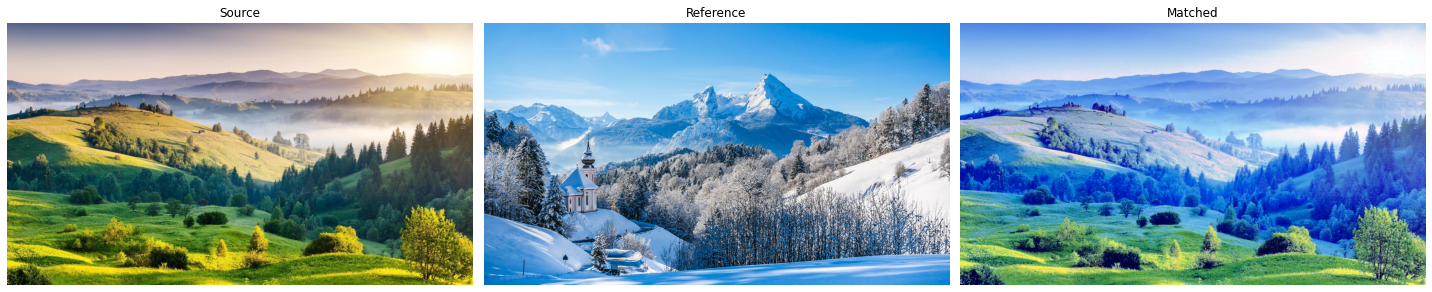

In [30]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms #loading function for histogram matching

img = cv.imread("/content/drive/MyDrive/CV2022/pics/a.jpg")
reference = cv.imread("/content/drive/MyDrive/CV2022/pics/b.jpg")

b,g,r = cv.split(reference)       # get blue,green,red channels
reference = cv.merge([r,g,b])     # merge channels to get the RGB image
b,g,r = cv.split(img)       
img = cv.merge([r,g,b]) 

matched = match_histograms(img, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(img)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

Additional resources:

[OpenCV package
](https://docs.opencv.org/3.4/d9/df8/tutorial_root.html)

[Pillow package](https://pillow.readthedocs.io/en/stable/)

[Scikit image package](https://scikit-image.org/) 

[Linear Algebra package](https://numpy.org/) 

References:

R.C. Gonzalez, Digital Image Processing- 3rd Edition, editura Prentice Hall, New Jersey, SUA, pag. 568-572, 2008

Nixon M.S., Aguado A.S., Feature Extraction and Image Processing for Computer Vision (3ed., AP, 2012)
